# K Means Clustering

In [1]:
# Machine Learning algorithms are categorized into three main categories:
# Supervised Learning
# Unsupervised Learning
# Reinforcement Learning

# In Supervised Learning the dataset has a label column
# In Unsupervised Learning the dataset has no label column

# Using Unsupervised Learning we try to find the structure in the data and the clusters in the data So, we can make 
# useful predictions out of it.

# Supervised learning Algoritms:
# Linear Regression
# Logistic Regression
# Decision Tree
# Support Vector Machine
# Random Forest
# Naive Bayes
# KNN

# Un Supervised Learning Algorithms:
# K Means Clustering
# PCA

In [2]:
# Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [5]:
# Reading the file 

df = pd.read_csv('Data_Set\\K_Means\\income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


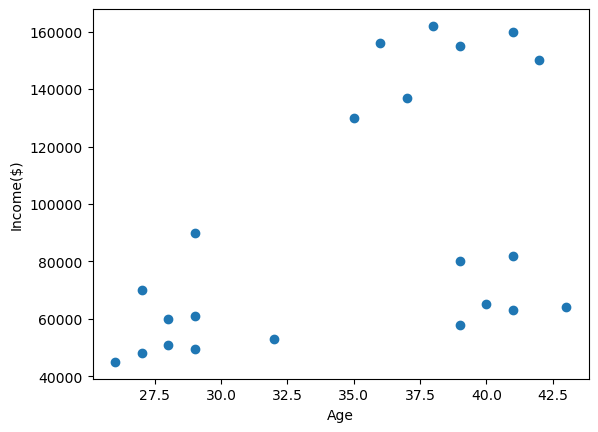

In [6]:
# Plotting the scatter plot

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.scatter(df['Age'], df['Income($)'])

In [9]:
# Creating the Model object

km = KMeans(n_clusters=3)

In [10]:
# Training and Predicting the model

y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted 

c:\Users\Hossnain\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [11]:
# Making new column of clusters in dataframe

df['cluster'] = y_predicted

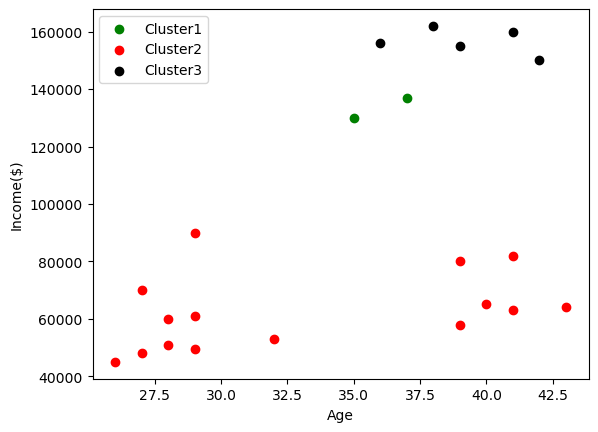

In [15]:
# Plotting the Scatter plot of clusters

df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]
df3 = df[df['cluster'] == 2]

plt.scatter(df1['Age'], df1['Income($)'], color = 'green', label='Cluster1')
plt.scatter(df2['Age'], df2['Income($)'], color = 'red', label='Cluster2')
plt.scatter(df3['Age'], df3['Income($)'], color = 'black', label='Cluster3')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [16]:
# Above the clusters are not done properly beacaue our scaling is not right. Our y-axis is scale
# from 40000 to 160000 and the range of x-axis is pretty narrow we have to do the preprocessing and use 
# MinMaxScaler to scale the features.

# MinMaxScalar scale the feature from 0 to 1

In [17]:
# Creating the Object of MinMaxScaler

scaler = MinMaxScaler() 


In [24]:
# Using MinMaxScalar 

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])


scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [25]:
# using K-Means

km = KMeans(n_clusters=3)

y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted 

c:\Users\Hossnain\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0])

In [26]:
# Making new column of clusters in dataframe

df['cluster'] = y_predicted

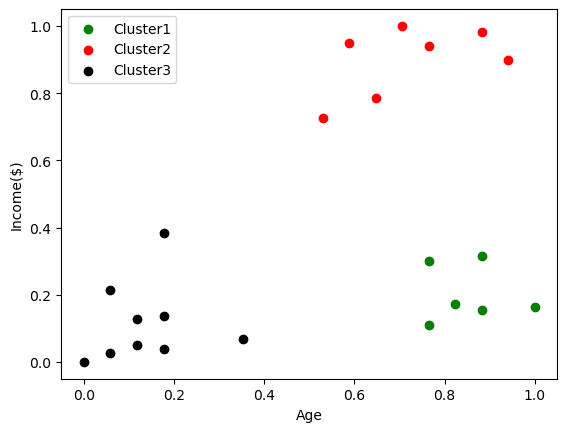

In [27]:
# Plotting the Scatter plot of clusters

df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]
df3 = df[df['cluster'] == 2]

plt.scatter(df1['Age'], df1['Income($)'], color = 'green', label='Cluster1')
plt.scatter(df2['Age'], df2['Income($)'], color = 'red', label='Cluster2')
plt.scatter(df3['Age'], df3['Income($)'], color = 'black', label='Cluster3')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [28]:
# printing Centroids

km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428]])

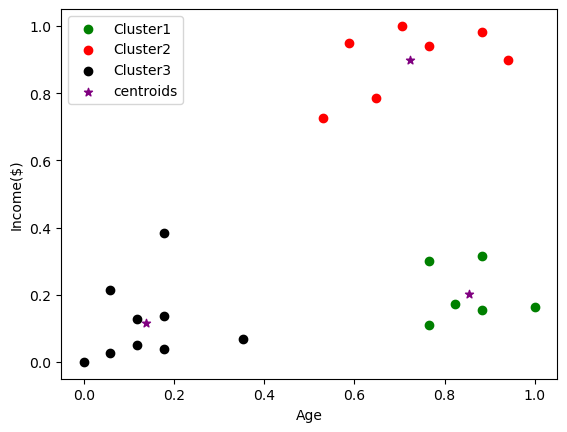

In [31]:
# Plotting the Centroids

df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]
df3 = df[df['cluster'] == 2]

plt.scatter(df1['Age'], df1['Income($)'], color = 'green', label='Cluster1')
plt.scatter(df2['Age'], df2['Income($)'], color = 'red', label='Cluster2')
plt.scatter(df3['Age'], df3['Income($)'], color = 'black', label='Cluster3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'purple', marker='*', label = 'centroids')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [33]:
# Finding the K using the elbow plot method

k_rng = range(1,11)
sse = []

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)
    

# inertia_ gives the Sum of Squared Error

c:\Users\Hossnain\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Hossnain\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Hossnain\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Hossnain\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory le

In [35]:
# Printing the Sum of Squared Error

sse

[5.434011511988176,
 2.091136388699076,
 0.4750783498553094,
 0.34910470944195643,
 0.33284248355621293,
 0.2707804026974908,
 0.17462386586687892,
 0.14686902060545337,
 0.13246345557512865,
 0.0943567304582299]

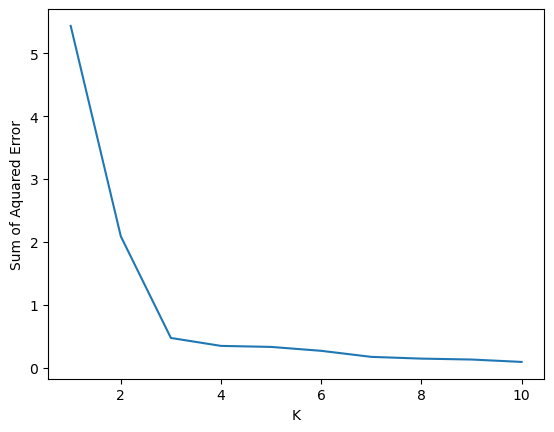

In [36]:
# Plotting the Sum of Aquared Error

plt.xlabel('K')
plt.ylabel('Sum of Aquared Error')
plt.plot(k_rng,sse)
